# Logistic Regression

In [1]:
# If data is not Linear then we use Logistic Regression

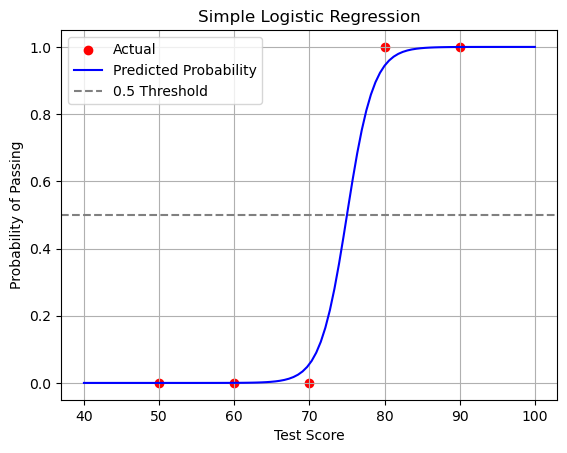

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Input (test scores)
X = np.array([[50], [60], [70], [80], [90]])  # Test scores
# Output (pass=1, fail=0)
y = np.array([0, 0, 0, 1, 1])  # Pass or fail

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities for test scores
X_test = np.linspace(40, 100, 100).reshape(-1, 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Plot
plt.scatter(X, y, color='red', label='Actual')
plt.plot(X_test, y_proba, color='blue', label='Predicted Probability')
plt.axhline(0.5, color='gray', linestyle='--', label='0.5 Threshold')
plt.xlabel("Test Score")
plt.ylabel("Probability of Passing")
plt.title("Simple Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# Logistic Regression on Dataset

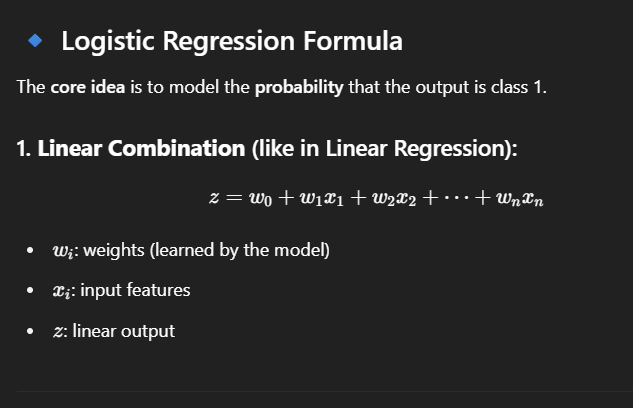

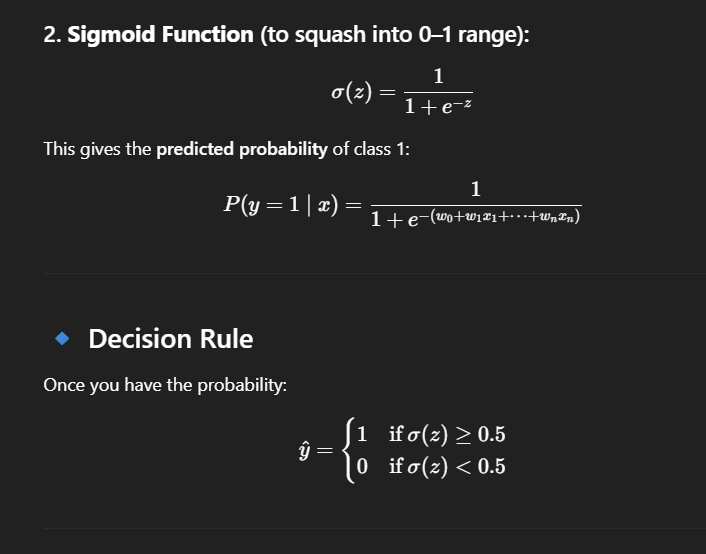

Inputs (x) → Linear Combination (z = w·x) → Sigmoid Function → Probability (0 to 1)


In [76]:
import numpy as np
import pandas as pd

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
Log_Reg = LogisticRegression()

In [80]:
data= load_breast_cancer()

In [81]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [82]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])  #Independent

In [51]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
y=pd.DataFrame(data['target'],columns=["Target"])

In [53]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [54]:
y['Target'].value_counts()  # Check the Target is balanced or not

Target
1    357
0    212
Name: count, dtype: int64

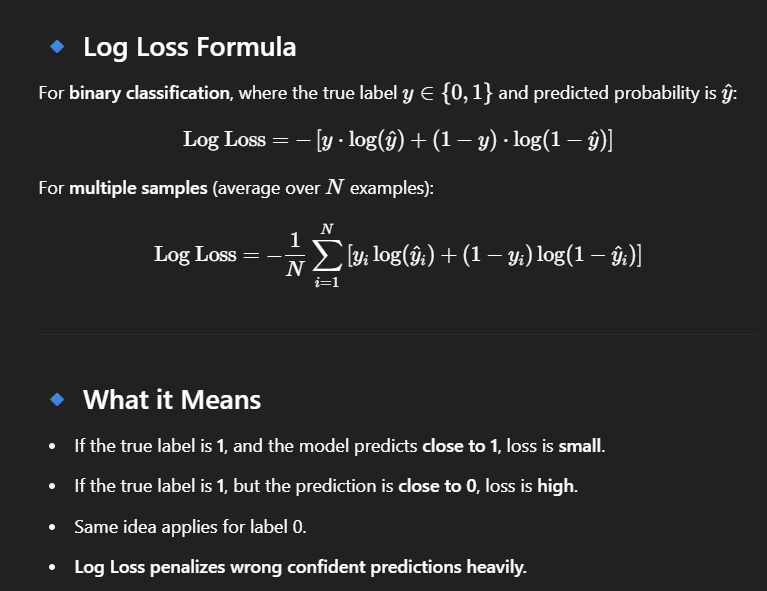

🧠 Why Log Loss?
- It’s differentiable (good for optimization).

- It gives a probability-aware cost, unlike accuracy.

- It encourages well-calibrated probabilities, not just correct class.

🔹 Why Do We Need a Converging Algorithm?

Both Linear Regression and Logistic Regression try to find the best weights (parameters) that minimize a cost function (like Mean Squared Error or Log Loss).

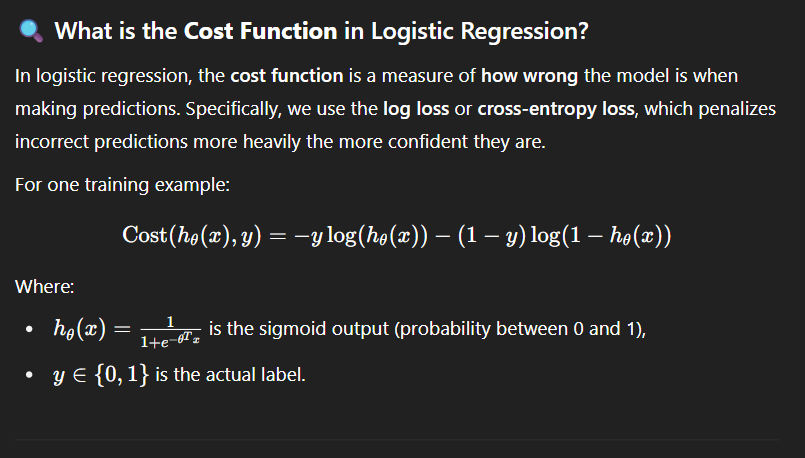

In [55]:
#Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [58]:
params=[{'C':[1,5,19]},{'max_iter':[100,150]}]

In [59]:
model1=LogisticRegression(C=100,max_iter=100)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
model=GridSearchCV(model1,param_grid=params,scoring="f1",cv=5)

In [62]:
model.fit(X_train,y_train)

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 19]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [63]:
# Check which is best parameter

In [64]:
model.best_params_

{'max_iter': 150}

In [65]:
model.best_score_

0.955683988821405

In [66]:
y_pred = model.predict(X_test)

In [85]:
X_test

array([[ 40.        ],
       [ 40.60606061],
       [ 41.21212121],
       [ 41.81818182],
       [ 42.42424242],
       [ 43.03030303],
       [ 43.63636364],
       [ 44.24242424],
       [ 44.84848485],
       [ 45.45454545],
       [ 46.06060606],
       [ 46.66666667],
       [ 47.27272727],
       [ 47.87878788],
       [ 48.48484848],
       [ 49.09090909],
       [ 49.6969697 ],
       [ 50.3030303 ],
       [ 50.90909091],
       [ 51.51515152],
       [ 52.12121212],
       [ 52.72727273],
       [ 53.33333333],
       [ 53.93939394],
       [ 54.54545455],
       [ 55.15151515],
       [ 55.75757576],
       [ 56.36363636],
       [ 56.96969697],
       [ 57.57575758],
       [ 58.18181818],
       [ 58.78787879],
       [ 59.39393939],
       [ 60.        ],
       [ 60.60606061],
       [ 61.21212121],
       [ 61.81818182],
       [ 62.42424242],
       [ 63.03030303],
       [ 63.63636364],
       [ 64.24242424],
       [ 64.84848485],
       [ 65.45454545],
       [ 66

In [67]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [88]:
print("X_test shape:", X_test.shape)
print("y_pred shape:", y_pred.shape)


X_test shape: (100, 1)
y_pred shape: (188,)


In [68]:
## Check Which Model is best 

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [70]:
confusion_matrix(y_test,y_pred)

array([[ 62,   5],
       [  4, 117]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred)

0.9521276595744681

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.96      0.97      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



# Regularization

🛡️ Why Use Regularization?
- A logistic regression model can become too flexible if θ values become too large.
- Large weights can cause the model to fit too tightly to the training data.
- Regularization adds a penalty to the cost function for large θ values, encouraging the model to keep them small.


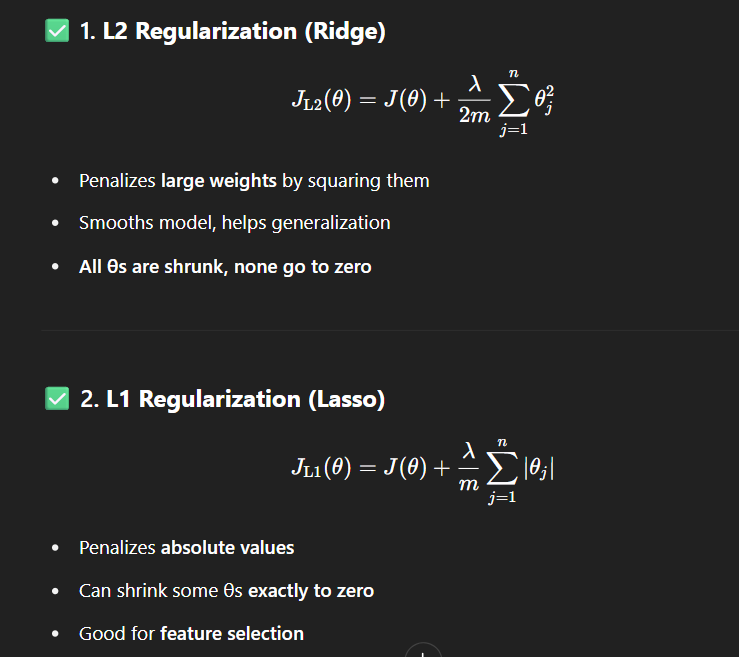

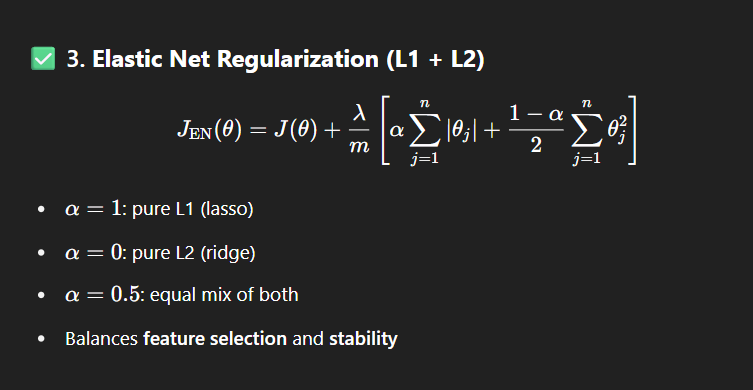

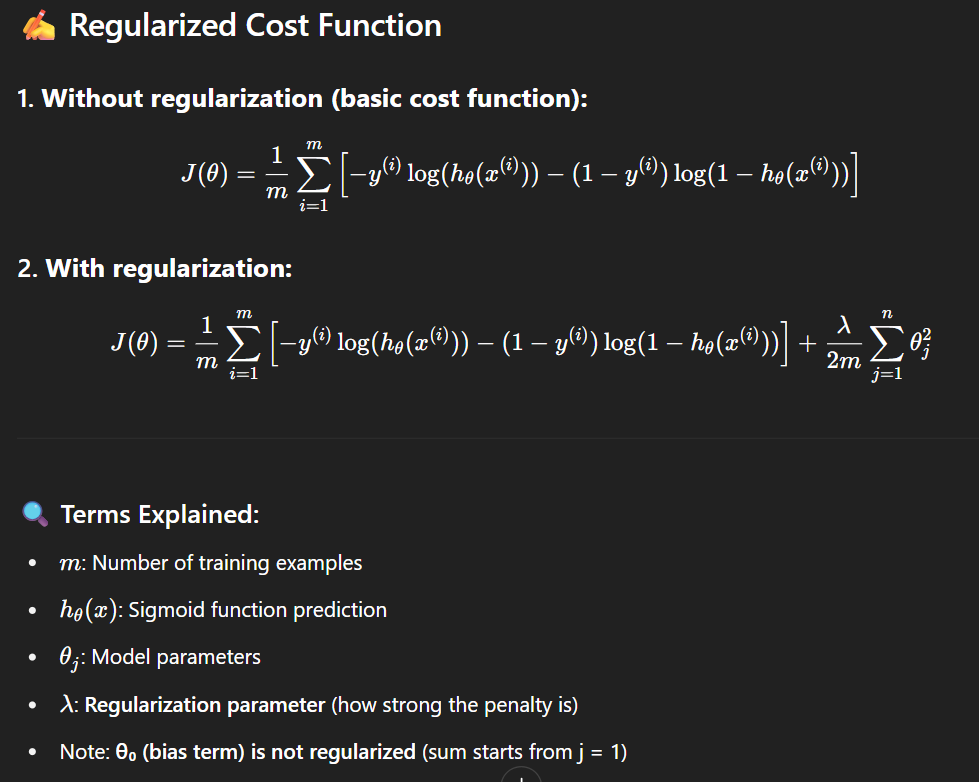

## Ridge

In [99]:
X.shape

(569, 30)

In [96]:
d1 = pd.DataFrame(data['target'],columns=['target'])

In [98]:
d1.shape

(569, 1)

In [100]:
from sklearn.model_selection import train_test_split


In [104]:
X = X  # independent variable
y = d1  # Dependent Variable

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [133]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge  = Ridge()

In [134]:
output = ridge.fit(X_train,y_train)

In [135]:
output

Ridge()

In [136]:
y_pred = output.predict(X_test)

In [137]:
X_test.shape,y_pred.shape

((143, 30), (143, 1))

In [138]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

In [139]:
print("Mean absolute error",mae)
print("R2 Score ",score)

Mean absolute error 0.1902612955940565
R2 Score  0.7512123884568822


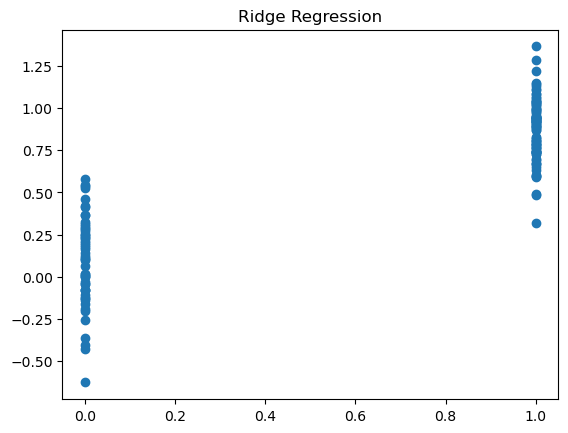

In [140]:
plt.title("Ridge Regression")
plt.scatter(y_test,y_pred)

In [142]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso  = Lasso()

In [143]:
output = lasso.fit(X_train,y_train)
y_pred = output.predict(X_test)

In [144]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)

Mean absolute error 0.23553015321774262
R2 Score  0.6326166356859868


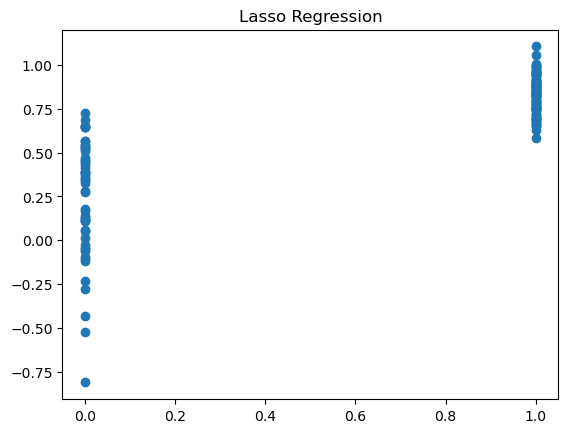

In [145]:
plt.title("Lasso Regression")
plt.scatter(y_test,y_pred)

In [146]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
eln  = ElasticNet()

In [147]:
output = eln.fit(X_train,y_train)
y_pred = output.predict(X_test)

In [150]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score ",score)

Mean absolute error 0.21996267676506065
R2 Score  0.684589243258011


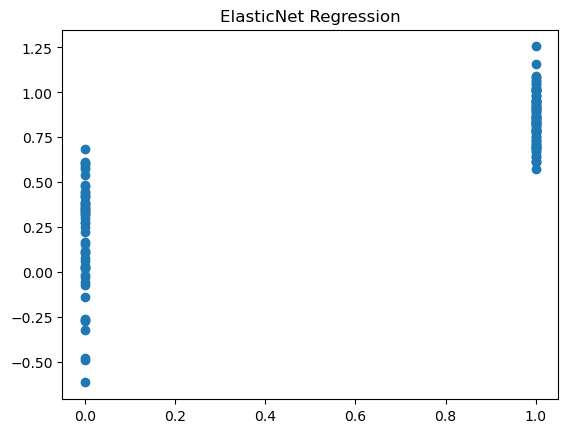

In [149]:
plt.title("ElasticNet Regression")
plt.scatter(y_test,y_pred)

| Model       | MAE ↓ (Better if smaller) | R² ↑ (Better if closer to 1) |
| ----------- | ------------------------- | ---------------------------- |
| **Ridge**   | **0.1903**                | **0.7512**                   |
| Elastic Net | 0.2200                    | 0.6846                       |
| Lasso       | 0.2355                    | 0.6326                       |


In [ ]:
Conclusion: Rigid perform well compared to all 

🎯 Why Do We Use a Confusion Matrix?

A confusion matrix is used to evaluate the performance of a classification model, especially when dealing with binary or multiclass problems.

It helps you see not just how many predictions were right or wrong, but also what kind of errors the model is making.

🧱 What Is a Confusion Matrix?

### For binary classification, it looks like this:

|                          | **Predicted: 0**    | **Predicted: 1**    |
| ------------------------ | ------------------- | ------------------- |
| **Actual: 0** (negative) | True Negative (TN)  | False Positive (FP) |
| **Actual: 1** (positive) | False Negative (FN) | True Positive (TP)  |


Meaning of Each Term:

True Positive (TP): Model correctly predicted Positive

True Negative (TN): Model correctly predicted Negative

False Positive (FP): Model incorrectly predicted Positive (Type I error)

False Negative (FN): Model incorrectly predicted Negative (Type II error)

### For Multiclass Classification :

|                     | **Predicted: Class 0**  | **Predicted: Class 1**  | **Predicted: Class 2**  |
| ------------------- | ----------------------- | ----------------------- | ----------------------- |
| **Actual: Class 0** | **True Class 0 (TP₀)**  | Class 0 → Class 1 (FP₁) | Class 0 → Class 2 (FP₂) |
| **Actual: Class 1** | Class 1 → Class 0 (FP₀) | **True Class 1 (TP₁)**  | Class 1 → Class 2 (FP₂) |
| **Actual: Class 2** | Class 2 → Class 0 (FP₀) | Class 2 → Class 1 (FP₁) | **True Class 2 (TP₂)**  |


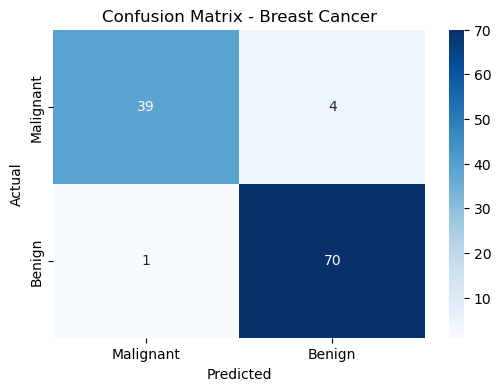

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [152]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=data.target_names))


### Conclusion : From confusion matrix we think that there is an imbalance data set of malignant  And Benigin 

### Now I will convert this data into Excel format and we check the value count of the data both malignant and Benigin

In [187]:
data = load_breast_cancer()

In [188]:
df = pd.DataFrame(data.data,columns=data.feature_names)


In [189]:
df['target'] = data.target

In [193]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [191]:
df['diagnosis'] = df['target'].map({0:'malignant',1:'benign'})

In [ ]:
df.to_excel("breast_cancer_cleaned.xlsx", index=False)

print("Excel file created: 'breast_cancer_cleaned.xlsx'")

In [195]:
df['diagnosis'].value_counts()

diagnosis
benign       357
malignant    212
Name: count, dtype: int64

### As we assume there is only a 212 on malignant and 357 on Benign This may be the cause of where we are getting the less accuracy on Bengin in the confusion matrix or Other reasons may be this is just an assumption we should confirm with the domain expert about this issue and move forward

### In this project the domain expert is very much important to make decisions